In [1]:
#   Lmportamos la libreria pandas para la lectura de archivos
import pandas as pd

#   Libreria para crear figuras en python
import matplotlib.pyplot as plt

#   libreria que permite dividir un DataSet en dos conjuntos de datos uno para entranamiento y otro para validación
from sklearn.model_selection import train_test_split

#   Libreria que evalua una puntuacion por validacion cruzada
from sklearn.model_selection import cross_val_score

#   Libreria que nos permite tomar valores prueba/valor de un conjunto de datos
from sklearn.model_selection import StratifiedKFold

#   Libreria para el uso de Regresion Logistica
from sklearn.linear_model import LogisticRegression

#   Libreria para el uso de arboles de decisión
from sklearn.tree import DecisionTreeClassifier

In [2]:
#   abrimos el archivo con el DataSet
df = pd.read_csv( "dataset_61_iris.arff" )

#   Muestro un resumen del numero de filas y columnas del archivo
print( df.shape )

(150, 5)


In [5]:
#   Dividimos el dataset en 80% de datos de entrenamiento (training) y 20% para pruebas (test)
array = df.values
#   Selecciono todas las columnas del DataSet excepto la columna "class"
x = array[:, 0:4]
#   Selecciono solo la columna 4 del DataSet que es la columna "class"
y = array[:, 4]

In [39]:
X_train, X_validation, Y_train, Y_validation = train_test_split( x, y, test_size=0.20, random_state=1, shuffle=True )

In [56]:
#   Cargamos los algoritmos
models = []

models.append( ('LR', LogisticRegression( solver='liblinear', multi_class='ovr' ) ) )
models.append( ( 'CART', DecisionTreeClassifier() ) )

In [57]:
#   Evaluamos cada modelo por turnos
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold( n_splits = 5, random_state = 1, shuffle = True )
    cv_results = cross_val_score( model, X_train, Y_train, cv = kfold, scoring = 'accuracy' )
    results.append( cv_results )
    names.append(name)
    print( '%s: %f (%f)' % ( name, cv_results.mean(), cv_results.std() ) )


LR: 0.941667 (0.042492)
CART: 0.950000 (0.031180)


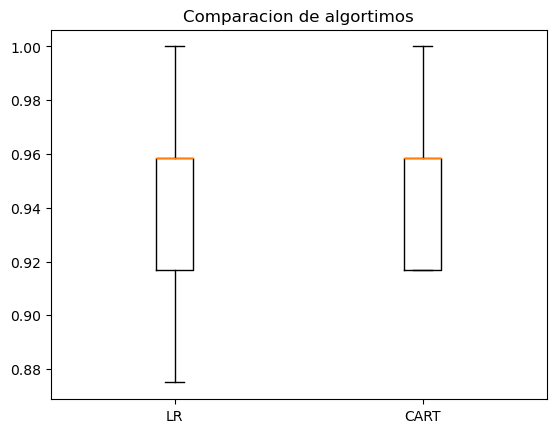

In [59]:
plt.boxplot( results, labels = names )
plt.title( 'Comparacion de algortimos' )
plt.show()